In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape
df.dropna(inplace = True, axis = 0)

In [ ]:
X= df.iloc[:, 1:]
y= df.iloc[:,0]

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


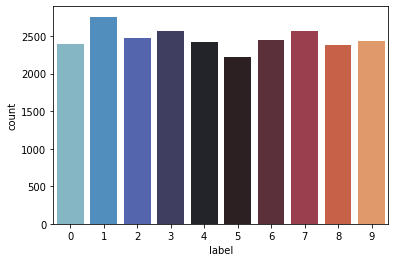

In [ ]:
# Digits to be classified
order= list(np.sort(df['label'].unique()))
print(order)

sns.countplot(df['label'], palette = 'icefire')

The image label is  1


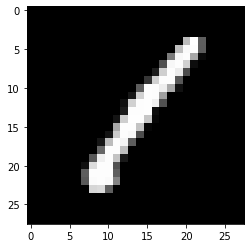

In [ ]:
pic1= np.array(X.loc[0])
pic1= pic1.reshape(28,28)
plt.imshow(pic1, cmap='gray')
print("The image label is ", y[0])

The image label is  0


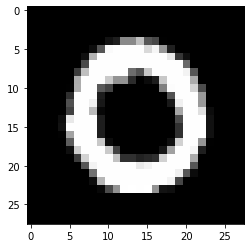

In [ ]:
pic1= np.array(X.loc[1])
pic1= pic1.reshape(28,28)
plt.imshow(pic1, cmap='gray')
print("The image label is ", y[1])

In [ ]:
#normalization the pixels values are from 0 to 255 we have to map them into 0-1 range
X= X/255 

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state= 8) 

In [ ]:
print("shape of X_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (19733, 784)
shape of y_train:  (19733,)
shape of X_test:  (4934, 784)
shape of y_test:  (4934,)


### CNN

In [ ]:
#MODEL BUILD
model = Sequential()
model.add(Dense(128, activation='relu', input_dim= 784)) #784 colums
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #10 class for classficatiom

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy') 

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_split= 0.25)

Epoch 1/20
463/463 [==============================] - 6s 10ms/step - loss: 0.4553 - accuracy: 0.8729 - val_loss: 0.2722 - val_accuracy: 0.9222
Epoch 2/20
463/463 [==============================] - 7s 14ms/step - loss: 0.2045 - accuracy: 0.9407 - val_loss: 0.2072 - val_accuracy: 0.9400
Epoch 3/20
463/463 [==============================] - 6s 13ms/step - loss: 0.1454 - accuracy: 0.9577 - val_loss: 0.1896 - val_accuracy: 0.9420
Epoch 4/20
463/463 [==============================] - 5s 11ms/step - loss: 0.1098 - accuracy: 0.9674 - val_loss: 0.1828 - val_accuracy: 0.9447
Epoch 5/20
463/463 [==============================] - 5s 11ms/step - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.1777 - val_accuracy: 0.9455
Epoch 6/20
463/463 [==============================] - 6s 12ms/step - loss: 0.0680 - accuracy: 0.9780 - val_loss: 0.1588 - val_accuracy: 0.9512
Epoch 7/20
463/463 [==============================] - 4s 9ms/step - loss: 0.0474 - accuracy: 0.9869 - val_loss: 0.1688 - val_accuracy: 0.9528


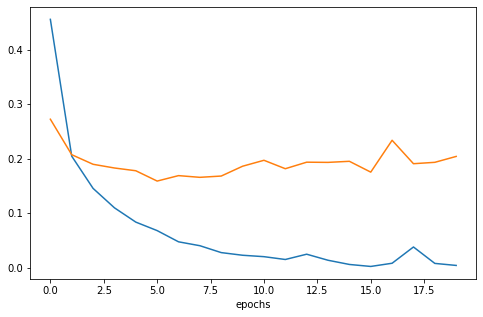

In [ ]:
# plotting the change in loss with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

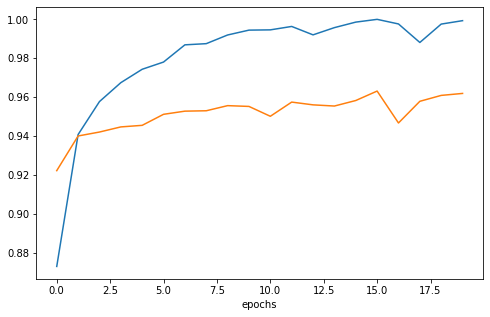

In [ ]:
# plotting the change in accuracy with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#probilities
y_prob= model.predict(X_test)

155/155 [==============================] - 0s 2ms/step


In [ ]:
y_pred= y_prob.argmax(axis=1)

In [ ]:
accuracy_score(y_test, y_pred)

0.957640859343332

In [ ]:
y_pred

array([1, 0, 3, ..., 3, 3, 9])

The image label is  0


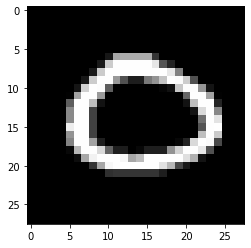

In [ ]:
pic2= np.array(X_test.iloc[1])
pic2= pic2.reshape(28,28)
plt.imshow(pic2, cmap='gray')
print("The image label is ", y_pred[1])

### SVM

In [ ]:
model_linear= SVC(kernel= 'linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred= model_linear.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.918321848398865 

[[455   0   0   1   0   4   6   0   0   0]
 [  1 553   4   2   0   0   0   0   5   0]
 [  5   4 421   7   7   0   3   7   5   0]
 [  5   2  19 452   0  21   1   1  10   3]
 [  4   3   5   1 479   0   2   5   4  19]
 [  7   6   7  22   4 389   6   1   6   5]
 [  4   2   6   0   0   5 451   0   1   0]
 [  1   2   3   5   6   2   0 489   2  20]
 [  1   8   9  19   3  10   3   1 405   7]
 [  1   1   8   6  21   0   0  13   3 437]]


In [ ]:
model_rbf= SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf= model_rbf.predict(X_test)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.967571949736522 

[[461   0   0   0   1   0   2   0   2   0]
 [  0 554   8   0   1   0   1   0   1   0]
 [  0   2 448   2   1   0   0   3   3   0]
 [  2   1  11 484   0   8   1   0   4   3]
 [  0   2   0   0 502   1   1   0   1  15]
 [  0   0   1   8   0 437   2   0   4   1]
 [  3   0   1   0   0   4 460   0   1   0]
 [  2   3   1   0   5   1   0 509   1   8]
 [  1   2   4   2   2   4   2   0 447   2]
 [  3   0   1   3   6   0   0   3   2 472]]


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

predictions = knn.predict(X_test)
metrics.accuracy_score(y_test,predictions)

0.9564248074584516

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       466
           1       0.94      0.99      0.96       565
           2       0.97      0.94      0.95       459
           3       0.93      0.96      0.94       514
           4       0.97      0.95      0.96       522
           5       0.96      0.95      0.95       453
           6       0.97      0.97      0.97       469
           7       0.96      0.96      0.96       530
           8       0.98      0.89      0.93       466
           9       0.93      0.95      0.94       490

    accuracy                           0.96      4934
   macro avg       0.96      0.96      0.96      4934
weighted avg       0.96      0.96      0.96      4934



#### QOC

In [ ]:
dp = []
res = []
original = []
total_size = int(0)

# Function that returns true if it is possible
# to use elements with index = ind to construct
# a set of size = curr_size whose sum is curr_sum.
def possible(index, curr_sum, curr_size):
	
	index = int(index)
	curr_sum = int(curr_sum)
	curr_size = int(curr_size)
	
	global dp, res
	
	# Base cases
	if curr_size == 0:
		return (curr_sum == 0)
	if index >= total_size:
		return False
	
	# Which means curr_sum cant be
	# found for curr_size
	if dp[index][curr_sum][curr_size] == False:
		return False
	
	if curr_sum >= original[index]:
		res.append(original[index])
		
		# Checks if taking this element
		# at index i leads to a solution
		if possible(index + 1,
					curr_sum - original[index],
					curr_size - 1):
			return True
			
		res.pop()
	
	# Checks if not taking this element at
	# index i leads to a solution
	if possible(index + 1, curr_sum, curr_size):
		return True
	
	# If no solution has been found
	dp[index][curr_sum][curr_size] = False
	return False

# Function to find two partitions
# having equal average
def partition(Vec):
	
	global dp, original, res, total_size
	
	# Sort the vector
	Vec.sort()
	
	if len(original) > 0:
		original.clear()
	
	original = Vec
	
	if len(dp) > 0:
		dp.clear()
	if len(res) > 0:
		res.clear()

	total_sum = 0
	total_size = len(Vec)

	for i in range(total_size):
		total_sum += Vec[i]
	
	# Building the memoization table
	dp = [[[True for _ in range(total_size)]
				for _ in range(total_sum + 1)]
				for _ in range(len(original))]
	
	for i in range(1, total_size):
		
		# Sum_of_Set1 has to be an integer
		if (total_sum * i) % total_size != 0:
			continue
			
		Sum_of_Set1 = (total_sum * i) / total_size

		# We build our solution vector if its possible
		# to find subsets that match our criteria
		# using a recursive function
		if possible(0, Sum_of_Set1, i):

			# Find out the elements in Vec,
			# not in res and return the result.
			ptr1 = 0
			ptr2 = 0
			res1 = res
			res2 = []
			
			while ptr1 < len(Vec) or ptr2 < len(res):
				if (ptr2 < len(res) and
					res[ptr2] == Vec[ptr1]):
					ptr1 += 1
					ptr2 += 1
					continue
					
				res2.append(Vec[ptr1])
				ptr1 += 1

			ans = []
			ans.append(res1)
			ans.append(res2)
			
			return ans
	
	# If we havent found any such subset.
	ans = []
	return ans

# Driver code
lst=[]
lst = [int(item) for item in input("Enter the list items : ").split()]
print(lst)


sol = partition(lst)

if len(sol) > 0:
	print(sol)
else:
	print("-1")

Enter the list items : 2
[2]
-1
